In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535047611&Signature=Tee6kU8ZAz0LfC0hz4rVzFxRZZSYT67P2wvFX4DSQdMuUyqzrjUFfeWdPPd6p6P%2FfVhYw13lChsRP8tLqnrCb8Tdvmzl9ina6qXcj12Cv4Rpz3tzaZuPAeuYsrXBXhqJqFSk8Iuw7EoFbdqNxb4RadywmPkBjyAuKsHhP5yFol%2B3LG%2FJBTYMP4ZaTVo1ZlGYtneVGeL7gOt5moDWTM9eUDklShr94ARqC8fNnnaX%2Fmd1b1Rnl7oIasn%2BnikpTJh8cswxwmUcN289pmIL3L3Q5carUZBzNHdGkeZ%2BRdREKPNk4%2BikbsFGDyKxBvTeLuHFYW6CUCUToCOhYnkLfSHyvw%3D%3D')

In [10]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [78]:
dummies = pd.get_dummies(df['Bsmt Qual'])

In [79]:
dummies['SalePrice'] = df['SalePrice']

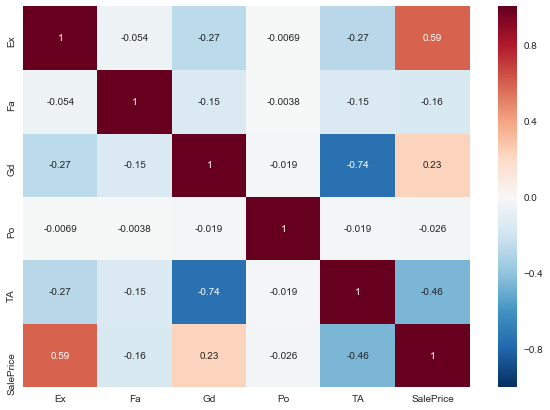

In [80]:
from matplotlib import pyplot
size = (10, 7)
fig, ax = pyplot.subplots(figsize=size)

sns.heatmap(dummies.corr(), annot = True);

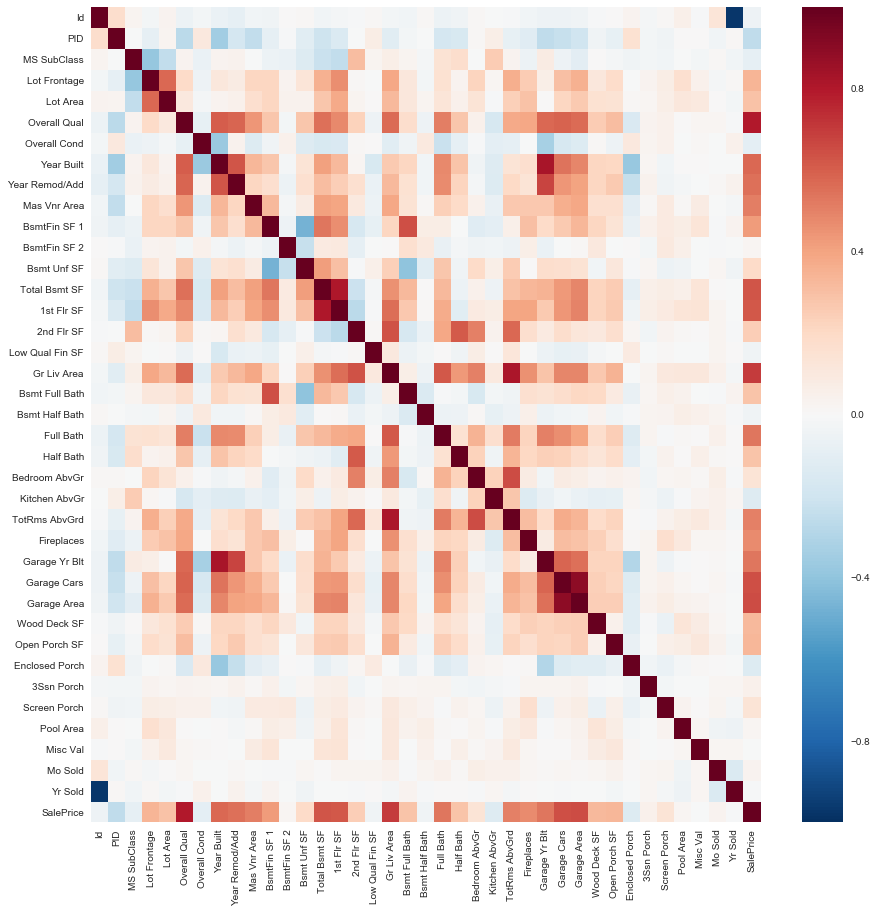

In [12]:
from matplotlib import pyplot
size = (15, 15)
fig, ax = pyplot.subplots(figsize=size)
sns.heatmap(df.corr())

In [ ]:
#the following variables I want to separate out
#Overall Qual, Year Built, Year Remod/Add, Total Bsmt SF, 1st Flr SF, GR Liv Area, Garage Cars, Garage Area

In [58]:
df_C = df[['SalePrice', 'Id', 'Overall Qual', 'Year Built', 'Year Remod/Add',
           'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]

In [75]:
df_C.dropna(inplace = True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
df_C.isnull().sum()

SalePrice         0
Id                0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
dtype: int64

In [78]:
dfb = df_C[['Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area']]

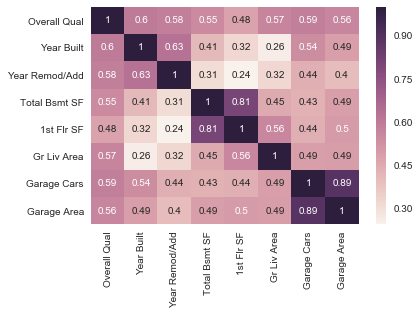

In [79]:
sns.heatmap(dfb.corr(), annot = True)

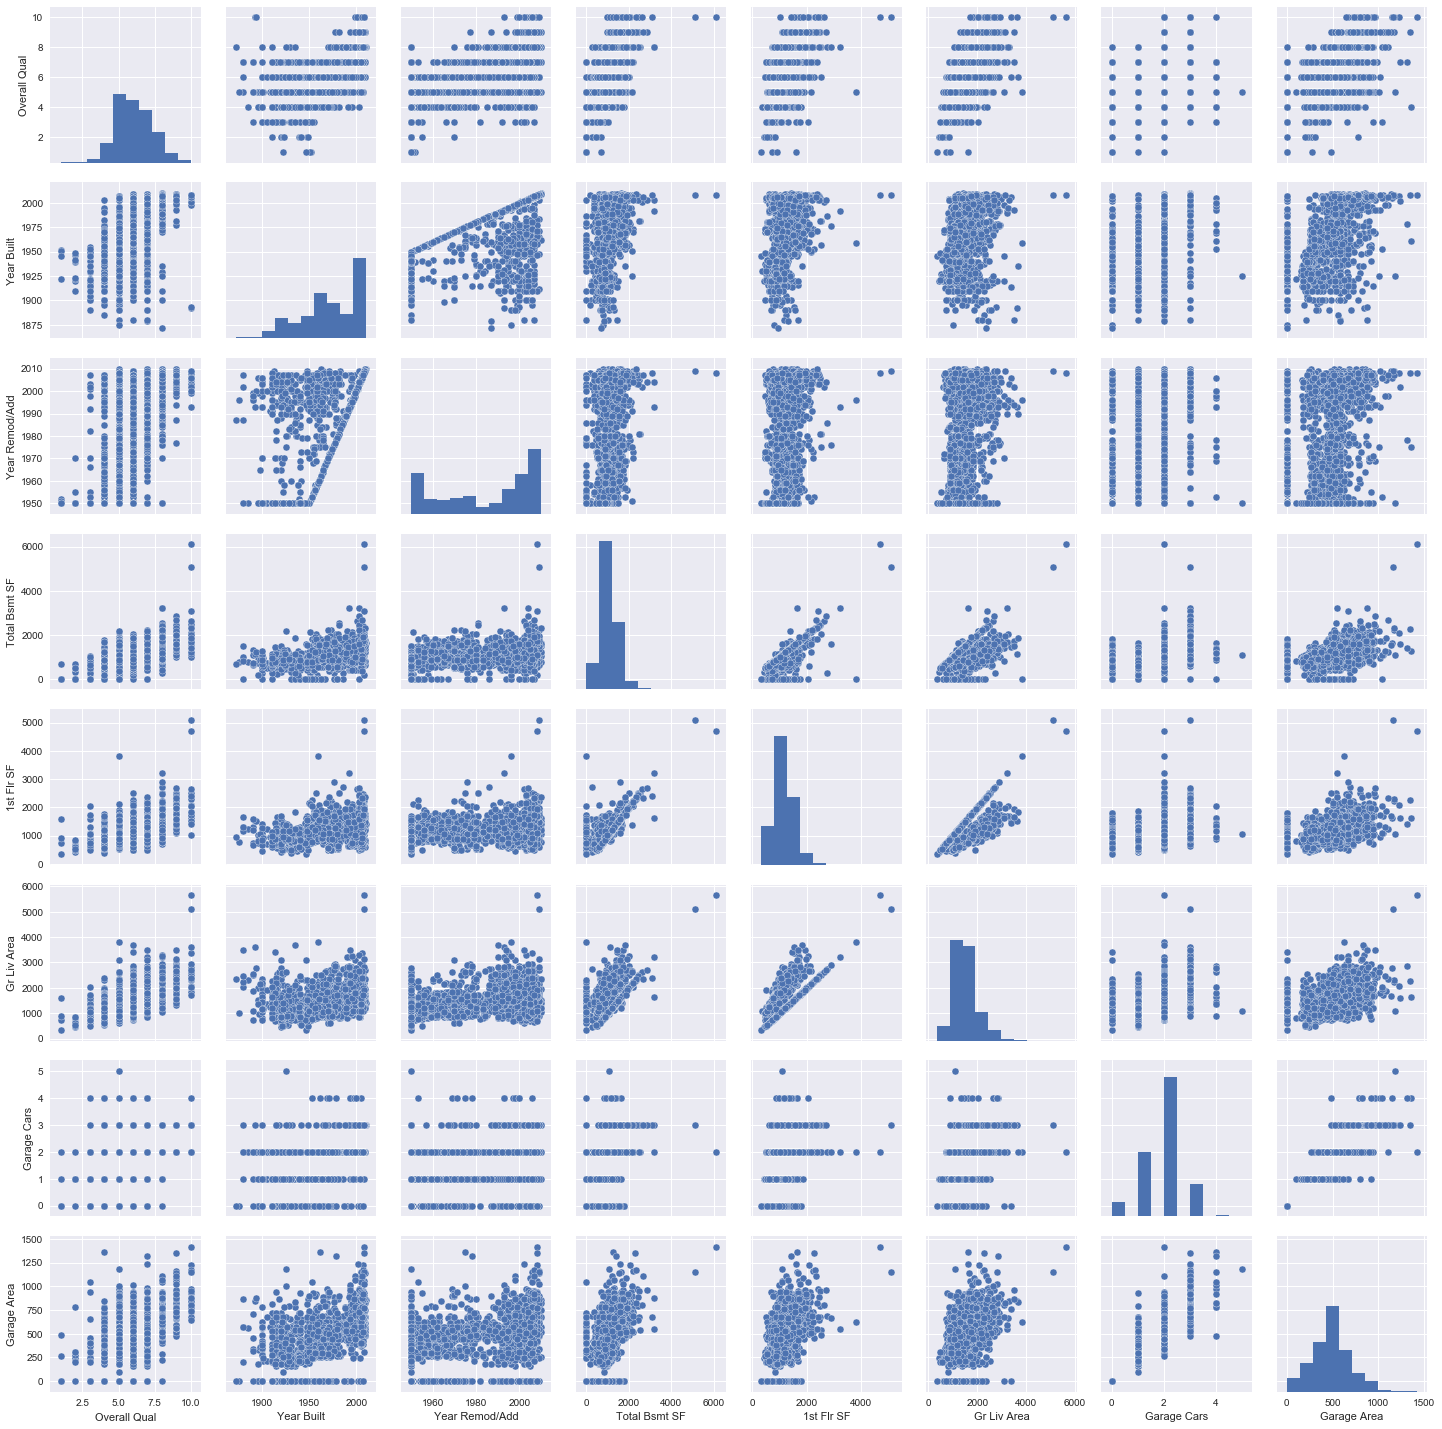

In [80]:
sns.pairplot(dfb)

In [81]:
X = dfb[['Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area']]
y = df_C['SalePrice']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [83]:
lr = LinearRegression()

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(lr, X_train, y_train, cv=kf)
scores.mean()

0.7908339605624585

In [88]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
lr.score(X,y)

0.789972346987969

In [99]:
from sklearn.metrics import mean_squared_error as mse

y_hat = lr.predict(X)
df_C['y_hat'] = y_hat

#A:
mse(y, y_hat)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1318851097.184065

In [100]:
df_C.head()

,SalePrice,Id,Overall Qual,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,y_hat
0,130500,109,6,1976,2005,725.0,725,1479,2.0,475.0,170226.167150
1,220000,544,7,1996,1997,913.0,913,2122,2.0,559.0,230265.233547
2,109000,153,5,1953,2007,1057.0,1057,1057,1.0,246.0,127992.699652
3,174000,318,5,2006,2007,384.0,744,1444,2.0,400.0,147585.756885
4,138500,255,6,1900,1993,676.0,831,1445,2.0,484.0,150546.667894


In [95]:
lr.predict(X)

array([170226.16715048, 230265.23354699, 127992.69965219, ...,
       171424.4304003 , 108447.78842379, 218095.42745045])

In [97]:
np.sqrt(mse(y, y_hat))

36315.989552593295

In [103]:
df_S = df_C[['Id', 'y_hat']]

In [104]:
df_S

,Id,y_hat
0,109,170226.167150
1,544,230265.233547
2,153,127992.699652
3,318,147585.756885
4,255,150546.667894
5,138,229069.068266
6,2827,167145.610067
7,145,142927.357616
8,1942,108700.718811
9,1956,177688.067002


In [105]:
test_kaggle = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535054787&Signature=pOjtRqomtGsSeRqFNBj26jelnJ1ZSghVUY95xXEQHRYHeUxyd1YZjyG02fQx5H0ZgDi4Rp9m%2FMRKlJr6fNBXiuHZq57%2FWgfwXPT002pCWt%2BLa7cdOaA0pTChSXexY2w93viAoAkHHZi3gLSD3M7YGu71ONN8hJPA2qP60oeUD7PNRFAzOjzYFat%2F7nRF%2FtRQrOFLAT9pn04AAiWrjwGiwx10ZfnnF%2BVStaIYVDTU5%2FsMTPS9y3WyDftCfPNwV7UyGEaPyVa5nEefbu7hnMSUQOOEMTwiFCSPByRnN8fNT5WZB3B%2F1l82FOBhZaXa9qq%2FRPYkXNyWNVbQ7spSeEyMmw%3D%3D')

In [106]:
test_kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [112]:
ktest = test_kaggle[['Id', 'Overall Qual', 'Year Built', 'Year Remod/Add',
           'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]
b = test_kaggle[['Overall Qual', 'Year Built', 'Year Remod/Add',
           'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]

In [113]:
SalePrice = lr.predict(b)

In [115]:
ktest['SalePrice'] = SalePrice

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [117]:
ktest = ktest[['Id', 'SalePrice']]

In [118]:
ktest.head()

,Id,SalePrice
0,2658,162552.561022
1,2718,217641.989150
2,2414,193715.996880
3,1989,127291.736253
4,625,181460.652501


In [120]:
ktest.to_csv('Good1.csv', sep=',', index=False)

In [121]:
ktest.shape

(879, 2)